In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-churn/Telco_customer_churn.xlsx - Telco_Churn.csv


# Discription :

- A fictional telco company that provided home phone and Internet services to 7043 customers in California in Quarter 3 of the fiscal year.

| # |Attribute                     |Description                                                                                                                                                                                                   |
|---|:----------------------------:|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|1  |         CUSTOMERID:          |A unique ID that identifies each customer.                                                                                                                                                                    |
|2  |            COUNT:            |A value used in reporting/dashboarding to sum up the number of customers in a filtered set.                                                                                                                   |
|3  |           COUNTRY:           |The country of the customer’s primary residence.                                                                                                                                                              |
|4  |            STATE:            |The state of the customer’s primary residence.                                                                                                                                                                |
|5  |            CITY:             |The city of the customer’s primary residence.                                                                                                                                                                 |
|6  |          ZIP CODE:           |The zip code of the customer’s primary residence.                                                                                                                                                             |
|7  |          LAT LONG:           |The combined latitude and longitude of the customer’s primary residence.                                                                                                                                      |
|8  |          LATITUDE:           |The latitude of the customer’s primary residence.                                                                                                                                                             |
|9  |          LONGITUDE:          |The longitude of the customer’s primary residence.                                                                                                                                                            |
|10 |           GENDER:            |The customer’s gender: Male, Female                                                                                                                                                                           |
|11 |       SENIOR CITIZEN:        |Indicates if the customer is 65 or older: Yes, No                                                                                                                                                             |
|12 |           PARTNER:           |Indicate if the customer has a partner: Yes, No                                                                                                                                                               |
|13 |         DEPENDENTS:          |Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.                                                                                       |
|14 |        TENURE MONTHS:        |Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.                                                                                   |
|15 |        PHONE SERVICE:        |Indicates if the customer subscribes to home phone service with the company: Yes, No                                                                                                                          |
|16 |       MULTIPLE LINES:        |Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No                                                                                                                    |
|17 |      INTERNET SERVICE:       |Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.                                                                                                       |
|18 |       ONLINE SECURITY:       |Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No                                                                                                |
|19 |        ONLINE BACKUP:        |Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No                                                                                                  |
|20 |      DEVICE PROTECTION:      |Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No                                                                    |
|21 |        TECH SUPPORT:         |Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No                                                                                |
|22 |        STREAMING TV:         |Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.                   |
|23 |      STREAMING MOVIES:       |Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.                                  |
|24 |          CONTRACT:           |Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.                                                                                                                           |
|25 |      PAPERLESS BILLING:      |Indicates if the customer has chosen paperless billing: Yes, No                                                                                                                                               |
|26 |       PAYMENT METHOD:        |Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check                                                                                                                        |
|27 |       MONTHLY CHARGE:        |Indicates the customer’s current total monthly charge for all their services from the company.                                                                                                                |
|28 |        TOTAL CHARGES:        |Indicates the customer’s total charges, calculated to the end of the quarter specified above.                                                                                                                 |
|29 |         CHURN LABEL:         |Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.                                                                               |
|30 |         CHURN VALUE:         |1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.                                                                                  |
|31 |         CHURN SCORE:         |A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.|
|32 |CLTV: CUSTOMER LIFETIME VALUE.|A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.                          |
|33 |        CHURN REASON:         |A customer’s specific reason for leaving the company. Directly related to Churn Category.                                                                                                                     |


# Analysis

- Q1: Please read the file and explain data types statistically as well as how python is reading it. Please let us know if any data type is read wrong.

- Q2: Please apply appropriate statistical measures using python based on data types.

- Q3: What is the percentage of females and senior citizens in this data set? Please create appropriate plots and explain the plots.

- Q4:  Please create an appropriate plot to examine the distribution of the tenure month column and explain the distribution. Based on distribution, perform appropriate statistical measures. Please also explain if the variable is symmetric or skewed. Please calculate it. Explain everything as asked.

- Q5: Please convert all binary columns into 0 and 1 using appropriate programming constructs, not one by one.

- Q6: Please examine the distribution of monthly charges between males and females using box plots. Please explain the results also. 

- Q7: Please find what is the minimum total charges for Los Angeles city. Please find which zip code has the maximum total charges.

- Q8: Please find which payment method has the highest churn score and which has the lowest churn score.

- Q9: Please create an appropriate plot to check the count of payment methods and explain it.

- Q10: Please create an appropriate plot to see the relationship between monthly charges and total charges.

In [45]:
filepath='/kaggle/input/customer-churn/Telco_customer_churn.xlsx - Telco_Churn.csv'
churn=pd.read_csv(filepath)

In [46]:
remove=['Count','Lat Long','Country','State','Churn Reason','Latitude', 'Longitude']   
churn.drop(columns=remove,inplace=True)


In [47]:
churn_test=churn.copy(deep=True)

In [35]:
churn.shape

(7043, 25)

In [5]:
churn.head().T

CustomerID,3668-QPYBK,9237-HQITU,9305-CDSKC,7892-POOKP,0280-XJGEX
City,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles
Zip Code,90003,90005,90006,90010,90015
Gender,Male,Female,Female,Female,Male
Senior Citizen,No,No,No,No,No
Partner,No,No,No,Yes,No
Dependents,No,Yes,Yes,Yes,Yes
Tenure Months,2,2,8,28,49
Phone Service,Yes,Yes,Yes,Yes,Yes
Multiple Lines,No,No,Yes,Yes,Yes
Internet Service,DSL,Fiber optic,Fiber optic,Fiber optic,Fiber optic


In [6]:
churn.tail().T

CustomerID,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,3186-AJIEK
City,Landers,Adelanto,Amboy,Angelus Oaks,Apple Valley
Zip Code,92285,92301,92304,92305,92308
Gender,Female,Male,Female,Female,Male
Senior Citizen,No,No,No,No,No
Partner,No,Yes,Yes,Yes,No
Dependents,No,Yes,Yes,Yes,No
Tenure Months,72,24,72,11,66
Phone Service,Yes,Yes,Yes,No,Yes
Multiple Lines,No,Yes,Yes,No phone service,No
Internet Service,No,DSL,Fiber optic,DSL,Fiber optic


In [7]:
precentage_of_null_value=((churn.isnull().sum()/len(churn))*100).round(0)

In [36]:
precentage_of_null_value

City                 0.0
Zip Code             0.0
Gender               0.0
Senior Citizen       0.0
Partner              0.0
Dependents           0.0
Tenure Months        0.0
Phone Service        0.0
Multiple Lines       0.0
Internet Service     0.0
Online Security      0.0
Online Backup        0.0
Device Protection    0.0
Tech Support         0.0
Streaming TV         0.0
Streaming Movies     0.0
Contract             0.0
Paperless Billing    0.0
Payment Method       0.0
Monthly Charges      0.0
Total Charges        0.0
Churn Label          0.0
Churn Value          0.0
Churn Score          0.0
CLTV                 0.0
dtype: float64

In [9]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 3668-QPYBK to 3186-AJIEK
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Gender             7043 non-null   object 
 3   Senior Citizen     7043 non-null   object 
 4   Partner            7043 non-null   object 
 5   Dependents         7043 non-null   object 
 6   Tenure Months      7043 non-null   int64  
 7   Phone Service      7043 non-null   object 
 8   Multiple Lines     7043 non-null   object 
 9   Internet Service   7043 non-null   object 
 10  Online Security    7043 non-null   object 
 11  Online Backup      7043 non-null   object 
 12  Device Protection  7043 non-null   object 
 13  Tech Support       7043 non-null   object 
 14  Streaming TV       7043 non-null   object 
 15  Streaming Movies   7043 non-null   object 
 16  Contract      

In [10]:
churn.dtypes.value_counts()

object     19
int64       5
float64     1
dtype: int64

In [11]:
churn.nunique()

City                 1129
Zip Code             1652
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
dtype: int64

In [ ]:
Count                   1
Country                 1
State                   1
Gender                  2
Senior Citizen          2
Partner                 2
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Churn Label             2
Churn Value             2


['CustomerID', 'State', 'City', 'Zip Code',
        'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason','Zip Code','City'],

In [54]:
col_obj=['Gender', 'Senior Citizen','Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
        'Churn Label', 'Churn Value','Zip Code','City']

In [55]:
for col in col_obj:
    churn[col] = churn[col].astype('category')

In [19]:
churn.dtypes

City                 category
Zip Code             category
Gender               category
Senior Citizen       category
Partner              category
Dependents           category
Tenure Months           int64
Phone Service        category
Multiple Lines       category
Internet Service     category
Online Security      category
Online Backup        category
Device Protection    category
Tech Support         category
Streaming TV         category
Streaming Movies     category
Contract             category
Paperless Billing    category
Payment Method       category
Monthly Charges       float64
Total Charges          object
Churn Label          category
Churn Value          category
Churn Score             int64
CLTV                    int64
dtype: object

In [ ]:

Total Charges          object


In [56]:
churn['Total Charges']=pd.to_numeric(churn['Total Charges'], downcast="float",errors='coerce')

In [26]:
churn.isnull().sum()

City                  0
Zip Code              0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
Churn Value           0
Churn Score           0
CLTV                  0
dtype: int64

In [62]:
churn[churn['Total Charges'].isnull()]['CustomerID'].unique()

array(['4472-LVYGI', '3115-CZMZD', '5709-LVOEQ', '4367-NUYAO',
       '1371-DWPAZ', '7644-OMVMY', '3213-VVOLG', '2520-SGTTA',
       '2923-ARZLG', '4075-WKNIU', '2775-SEFEE'], dtype=object)

In [63]:
churn_test[churn_test['CustomerID'].isin(['4472-LVYGI', '3115-CZMZD', '5709-LVOEQ', '4367-NUYAO',
       '1371-DWPAZ', '7644-OMVMY', '3213-VVOLG', '2520-SGTTA',
       '2923-ARZLG', '4075-WKNIU', '2775-SEFEE'])]

,CustomerID,City,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
2234,4472-LVYGI,San Bernardino,92408,Female,No,Yes,No,0,No,No phone service,...,No,Two year,Yes,Bank transfer (automatic),52.55,,No,0,36,2578
2438,3115-CZMZD,Independence,93526,Male,No,No,No,0,Yes,No,...,No internet service,Two year,No,Mailed check,20.25,,No,0,68,5504
2568,5709-LVOEQ,San Mateo,94401,Female,No,Yes,No,0,Yes,No,...,Yes,Two year,No,Mailed check,80.85,,No,0,45,2048
2667,4367-NUYAO,Cupertino,95014,Male,No,Yes,Yes,0,Yes,Yes,...,No internet service,Two year,No,Mailed check,25.75,,No,0,48,4950
2856,1371-DWPAZ,Redcrest,95569,Female,No,Yes,No,0,No,No phone service,...,No,Two year,No,Credit card (automatic),56.05,,No,0,30,4740
4331,7644-OMVMY,Los Angeles,90029,Male,No,Yes,Yes,0,Yes,No,...,No internet service,Two year,No,Mailed check,19.85,,No,0,53,2019
4687,3213-VVOLG,Sun City,92585,Male,No,Yes,Yes,0,Yes,Yes,...,No internet service,Two year,No,Mailed check,25.35,,No,0,49,2299
5104,2520-SGTTA,Ben Lomond,95005,Female,No,Yes,Yes,0,Yes,No,...,No internet service,Two year,No,Mailed check,20.00,,No,0,27,3763
5719,2923-ARZLG,La Verne,91750,Male,No,Yes,Yes,0,Yes,No,...,No internet service,One year,Yes,Mailed check,19.70,,No,0,69,4890
6772,4075-WKNIU,Bell,90201,Female,No,Yes,Yes,0,Yes,Yes,...,No,Two year,No,Mailed check,73.35,,No,0,44,2342


In [64]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerID         7043 non-null   object  
 1   City               7043 non-null   category
 2   Zip Code           7043 non-null   category
 3   Gender             7043 non-null   category
 4   Senior Citizen     7043 non-null   category
 5   Partner            7043 non-null   category
 6   Dependents         7043 non-null   category
 7   Tenure Months      7043 non-null   int64   
 8   Phone Service      7043 non-null   category
 9   Multiple Lines     7043 non-null   category
 10  Internet Service   7043 non-null   category
 11  Online Security    7043 non-null   category
 12  Online Backup      7043 non-null   category
 13  Device Protection  7043 non-null   category
 14  Tech Support       7043 non-null   category
 15  Streaming TV       7043 non-null   category
 16  Stream

In [86]:
col_obj1=['Gender', 'Senior Citizen','Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
        'Churn Label']

In [84]:
def pieplot(df,categoricals):# custom function for ploting pieplot , df is here any dataframe, categoricals for a list of columns
    count=1
    cmap = plt.get_cmap('Set1')
    colors = [cmap(i) for i in np.linspace(0, 1, 8)]# looping over color pattern of graph
    plt.subplots(figsize=(25,35),facecolor="#1CC4AF")# subplots in graph # size of plot
    for i in categoricals: # looping on varriable for charts
        plt.subplot(6,3,count)       # number of subplot and axis
        ax = plt.gca()# gca means "get current axes". "Current" here means that it provides a handle to the last active axes.
        sns.set(font_scale = 1)
        patches, texts, pcts = ax.pie( df[i].value_counts().values[:10], labels=df[i].value_counts().index[:10] , shadow=True, colors=colors, autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'})        # Pie Chart
        plt.setp(pcts, color='white', fontweight='bold')        # Display Precentage , color
        ax.set_title("Distribution of {}".format(i.capitalize()), fontsize=22)        # Adding SubTitle of chart
        count+=1
        centre_circle = plt.Circle((0, 0), 0.20, fc='white')        # draw circle
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)        # Adding Circle in Pie chart
        fig.subplots_adjust(wspace=.2)
        plt.tight_layout()# compact figure
    plt.suptitle('Distribution of categoricals variables', y=1.03, fontsize=30)        # Adding Title of chart
    plt.show()    # Displaying Chart

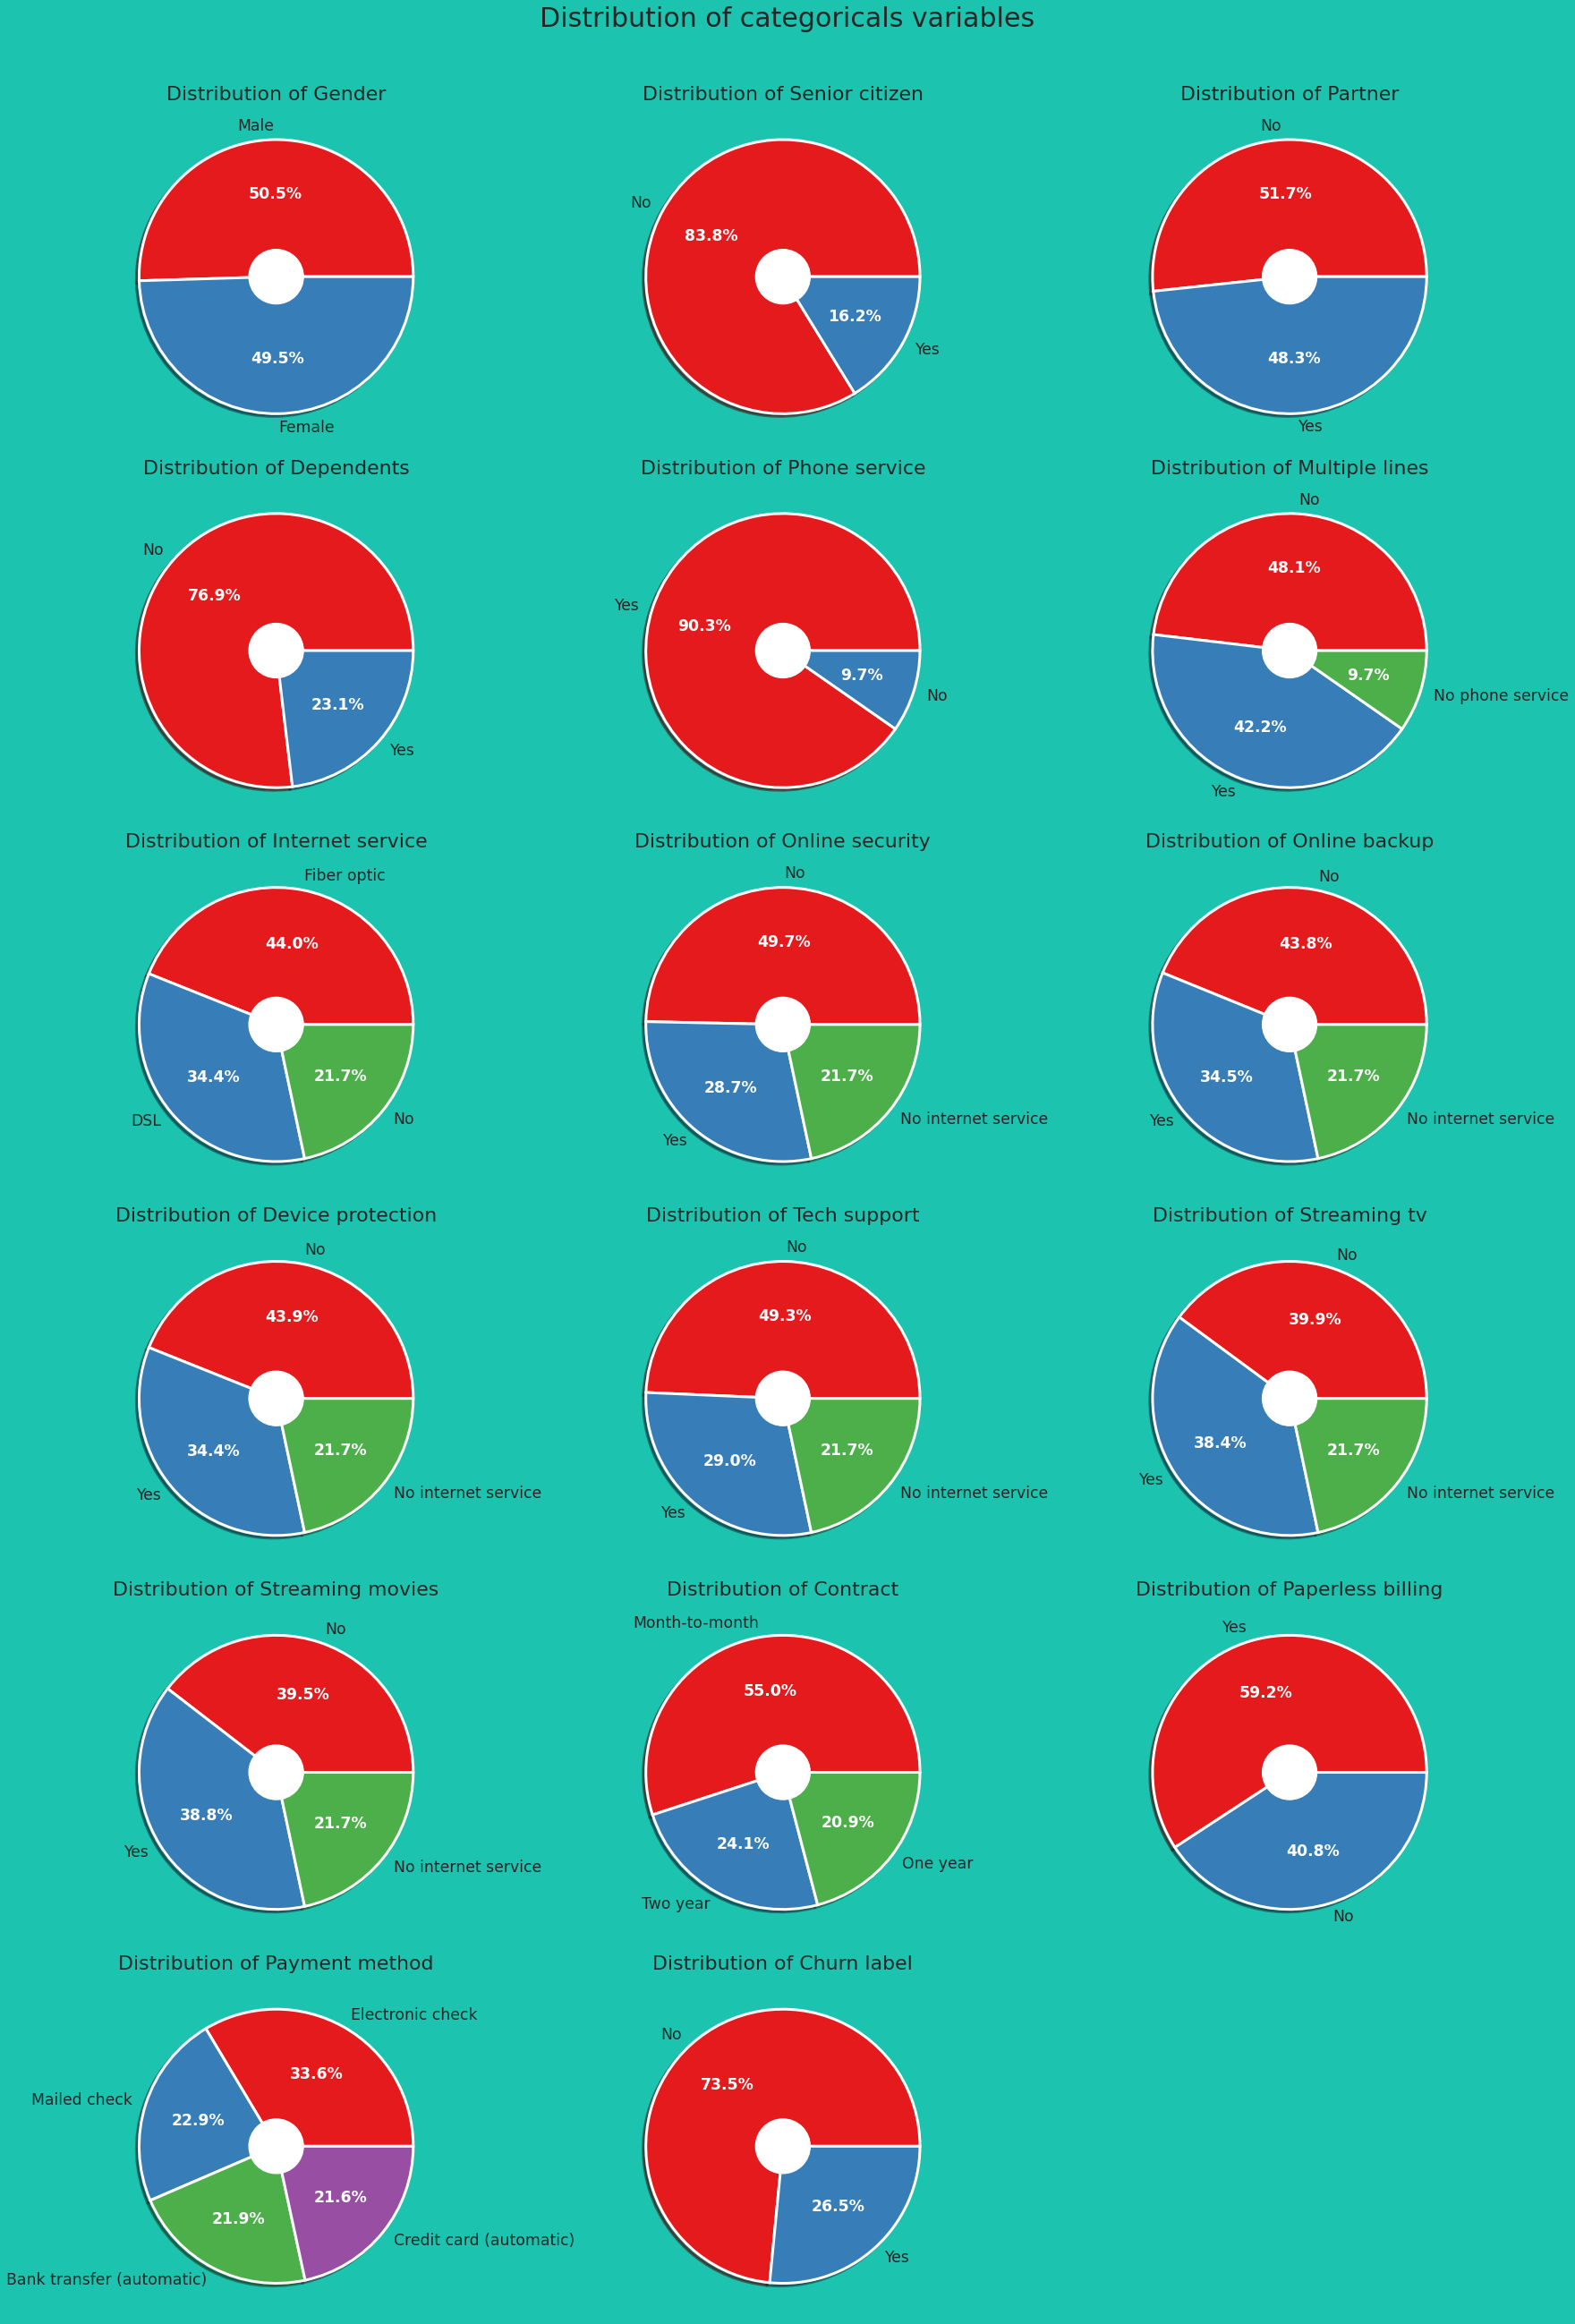

In [87]:
 pieplot(churn,col_obj1)

In [96]:
def histogram(df,numericals,bin_no):# custom function for ploting histograms , df is here any dataframe, numericals for a list of columns
    sns.color_palette("husl", 8)# color pattern of graph
    sns.set_style('darkgrid')# background style
    count=1
    plt.subplots(figsize=(30, 25))# subplots in graph
    for i in numericals:# looping on varriable
        plt.subplot(5,3,count)
        ax = plt.gca()# gca means "get current axes". "Current" here means that it provides a handle to the last active axes. 
        sns.set(font_scale = 1.5)# size of fonts
        sns.histplot(df[i],kde=True,bins=bin_no, palette="Set2", linewidth=2.5,color='g')# histogram with seaborn and density plot
        plt.xticks(rotation=90)# label at x axis 90 degree for proper spacing and vissiblity
        ax.set_title("Distribution of {}".format(i), fontsize=23)# title for each subplot
        count+=1 
        plt.tight_layout()# compact figure
    plt.suptitle('Distribution of numerical variables', y=1.03, fontsize=30)# title for whole plot
    plt.show()#display graph

In [93]:
churn.dtypes

CustomerID             object
City                 category
Zip Code             category
Gender               category
Senior Citizen       category
Partner              category
Dependents           category
Tenure Months           int64
Phone Service        category
Multiple Lines       category
Internet Service     category
Online Security      category
Online Backup        category
Device Protection    category
Tech Support         category
Streaming TV         category
Streaming Movies     category
Contract             category
Paperless Billing    category
Payment Method       category
Monthly Charges       float64
Total Charges         float32
Churn Label          category
Churn Value          category
Churn Score             int64
CLTV                    int64
dtype: object

In [94]:
numericals=churn.select_dtypes(include=['int64','float64','float32'])

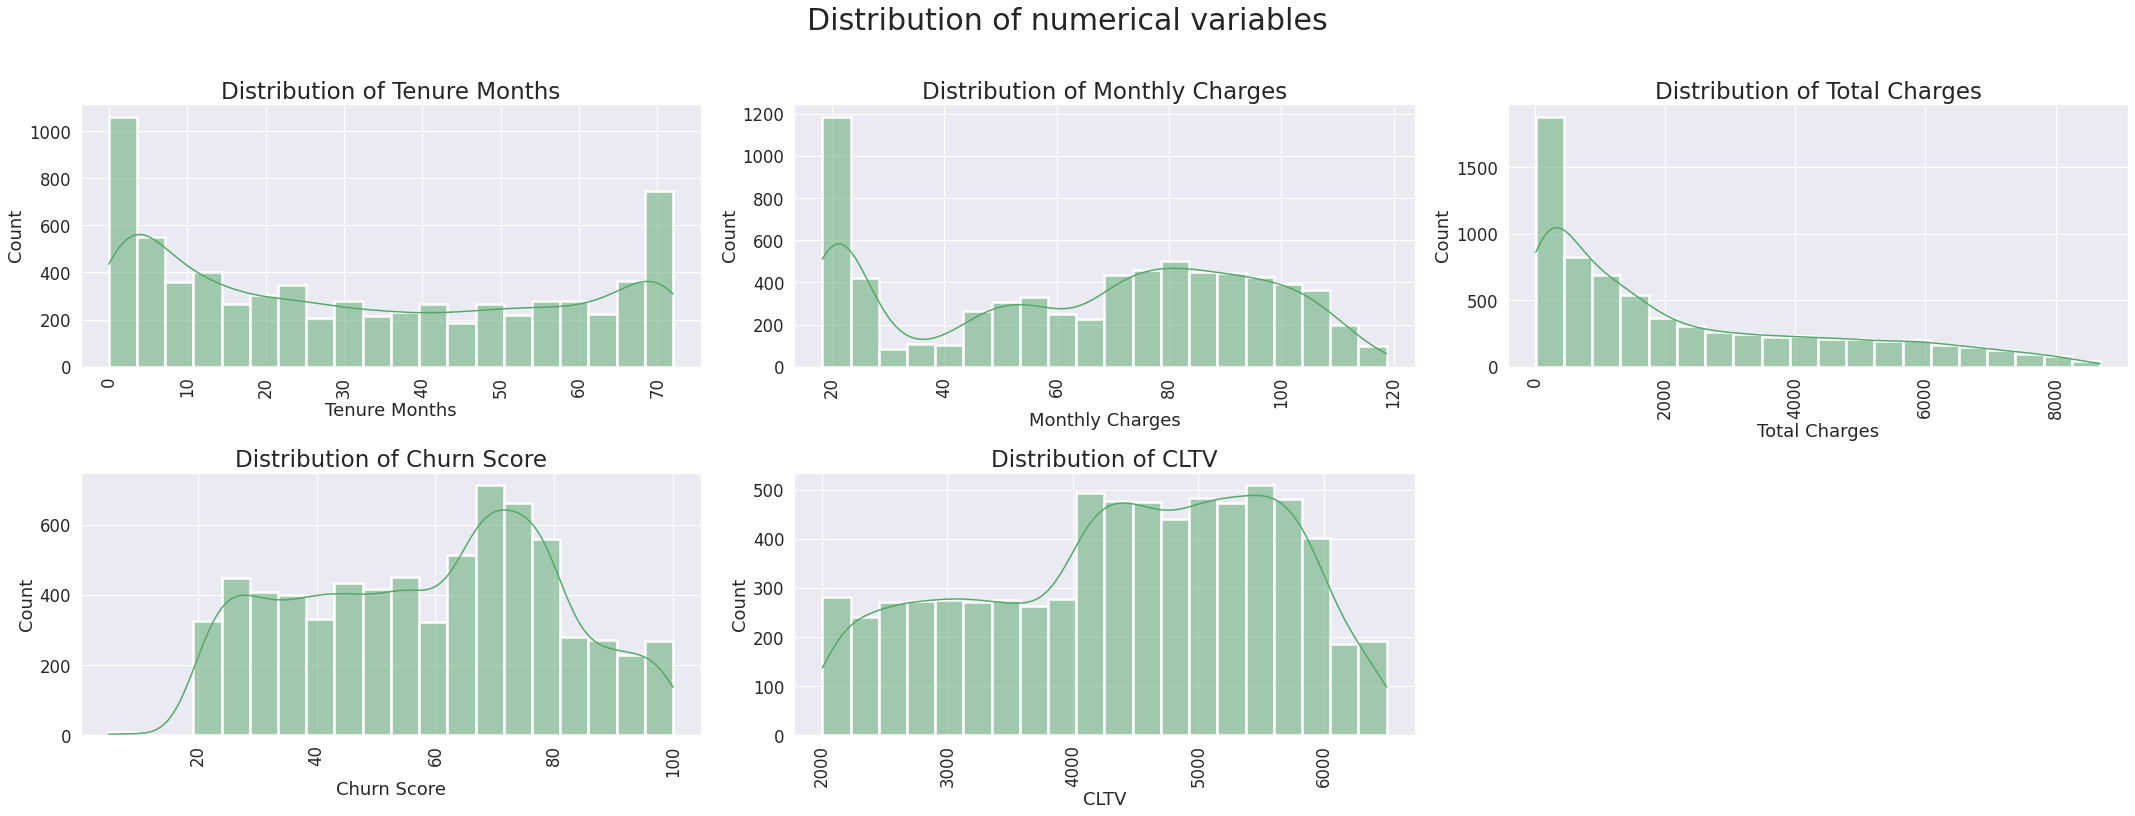

In [98]:
histogram(churn,numericals,20)

In [120]:
def countplot(df,categoricals):  # custom function for ploting coutnplot , df is here any dataframe, categoricals for a list of columns
    sns.color_palette("flare", as_cmap=True);# color pattern of graph
    sns.set_style('darkgrid')# background style
    count=1
    plt.subplots(figsize=(20, 30))# subplots in graph
    for i in categoricals:# looping on varriable
        plt.subplot(8,2,count)# number of subplot
        ax = plt.gca()# gca means "get current axes". "Current" here means that it provides a handle to the last active axes.
        sns.set(font_scale = 1)# size of fonts
        sns.countplot(df[i][:40],palette="Set2",orient='h',order=df[i].value_counts().sort_values().index[:40], linewidth=2.5,color='g')# countplot with order
        plt.xticks(rotation=90)# label at x axis 90 degree for proper spacing and vissiblity
        ax.set_title("Distribution of {}".format(i), fontsize=18)# title for each subplot
        count+=1 
        plt.tight_layout()# compact figure
    plt.suptitle('Distribution of categoricals variables', y=1.03, fontsize=30)# title for whole plot
    plt.show()#display graph

In [123]:
(churn['City'].value_counts()/len(churn['City'])*100)

Los Angeles      4.330541
San Diego        2.129774
San Jose         1.590231
Sacramento       1.533437
San Francisco    1.476643
                   ...   
Hood             0.056794
Hoopa            0.056794
Hopland          0.056794
Hornbrook        0.056794
Zenia            0.056794
Name: City, Length: 1129, dtype: float64

# Please create an appropriate plot to check the count of payment methods and explain it.

In [158]:
churn['Payment Method'].value_counts().index

CategoricalIndex(['Electronic check', 'Mailed check',
                  'Bank transfer (automatic)', 'Credit card (automatic)'],
                 categories=['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check'], ordered=False, dtype='category')

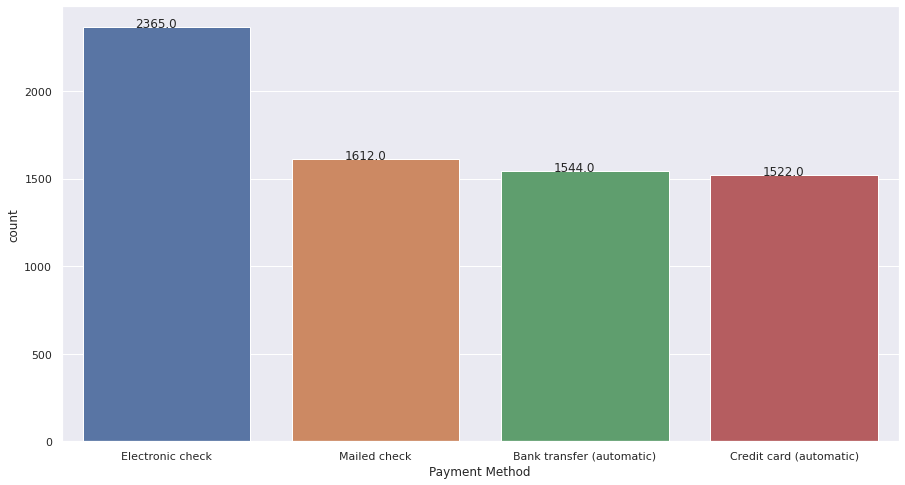

In [159]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x='Payment Method',data=churn,order=['Electronic check', 'Mailed check',
                  'Bank transfer (automatic)', 'Credit card (automatic)'])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# Please create an appropriate plot to see the relationship between monthly charges and total charges.

In [124]:
numericals

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV
0,2,53.85,108.150002,86,3239
1,2,70.70,151.649994,67,2701
2,8,99.65,820.500000,86,5372
3,28,104.80,3046.050049,84,5003
4,49,103.70,5036.299805,89,5340
...,...,...,...,...,...
7038,72,21.15,1419.400024,45,5306
7039,24,84.80,1990.500000,59,2140
7040,72,103.20,7362.899902,71,5560
7041,11,29.60,346.450012,59,2793


<AxesSubplot:xlabel='Total Charges', ylabel='Monthly Charges'>

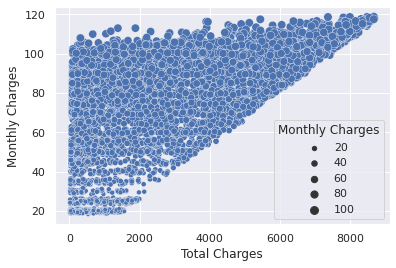

In [130]:
sns.scatterplot(data=churn, y="Monthly Charges", x="Total Charges",x_bins=10,
    y_bins=10,size="Monthly Charges")

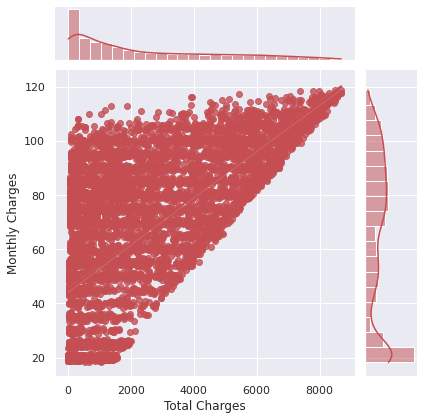

In [137]:
sns.set_theme(style="darkgrid")
sns.jointplot(data=churn, y="Monthly Charges", x="Total Charges",
                  kind="reg",palette="Set2",color='r')